In [1]:
from __future__ import annotations

In [2]:
import sys
sys.path.append('/Users/alex/Desktop/CS/Internships and Research/DBF/python_tools/')
from util.blackbox import decode_blackbox
from util.thrust import decode_thrust

In [91]:
import zipfile
import pandas as pd
import os
from io import StringIO
import matplotlib.pyplot as plt

In [4]:
with zipfile.ZipFile('../data/thrustStand/10_22_2023/Sun_10.22.23_ThrustData.zip') as z:
    print(z.namelist())

['Sun_10.22.23_ThrustData/AT5330_14x13x3_12s.txt', 'Sun_10.22.23_ThrustData/AT5330_15x14x3_12s.txt', 'Sun_10.22.23_ThrustData/AT5330_16x10x3_12s.txt', 'Sun_10.22.23_ThrustData/AT7215_14x13x3_12s.txt', 'Sun_10.22.23_ThrustData/AT7215_15x13.5x3_12s.txt', 'Sun_10.22.23_ThrustData/AT7215_15x14x3_12s.txt', 'Sun_10.22.23_ThrustData/AT7215_16x10x3_12s.txt', 'Sun_10.22.23_ThrustData/AT7215_16x12_12s.txt', 'Sun_10.22.23_ThrustData/AT7215_16x12_12s_limit_test.txt', 'Sun_10.22.23_ThrustData/AT7215_16x12_12s_RPM_test.txt', 'Sun_10.22.23_ThrustData/AT7215_16x14_12s.txt', 'Sun_10.22.23_ThrustData/AT7215_16x14XOR_12s_run_1.txt', 'Sun_10.22.23_ThrustData/AT7215_16x14XOR_12s_run_2.txt', 'Sun_10.22.23_ThrustData/AT7215_16x16_12s.txt', 'Sun_10.22.23_ThrustData/AT7215_16x16_8s.txt', 'Sun_10.22.23_ThrustData/AT7215_17x12_12s.txt', 'Sun_10.22.23_ThrustData/AT7215_17x12_8s.txt', 'Sun_10.22.23_ThrustData/AT7215_17x12XOR_12s.txt', 'Sun_10.22.23_ThrustData/AT7215_18x12_12s.txt', 'Sun_10.22.23_ThrustData/AT7215_

In [5]:
thrust_dfs: dict[str, pd.DataFrame] = decode_thrust('../data/thrustStand/10_22_2023/Sun_10.22.23_ThrustData.zip')

In [6]:
thrust_dfs

{'Sun_10.22.23_ThrustData':      motor       prop  battery avg_max_thrust (g)
 0   AT5330    14x13x3  12s.txt                  0
 1   AT5330    15x14x3  12s.txt                  0
 2   AT5330    16x10x3  12s.txt                  0
 3   AT7215    14x13x3  12s.txt                  0
 4   AT7215  15x13.5x3  12s.txt                  0
 5   AT7215    15x14x3  12s.txt                  0
 6   AT7215    16x10x3  12s.txt                  0
 7   AT7215      16x12  12s.txt                  0
 8   AT7215      16x14  12s.txt                  0
 9   AT7215      16x16  12s.txt                  0
 10  AT7215      16x16   8s.txt                  0
 11  AT7215      17x12  12s.txt                  0
 12  AT7215      17x12   8s.txt                  0
 13  AT7215   17x12XOR  12s.txt                  0
 14  AT7215      18x12  12s.txt                  0
 15  AT7215      18x14  12s.txt                  0
 16  AT7215      19x10  12s.txt                  0,
 'limit':     motor   prop battery avg_max_thrust (g)


In [7]:
log_dfs: dict[str, pd.DataFrame] = dict()

directory = '../data/thrustStand/10_22_2023/LOGS'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    
    name = f.split('/')[-1].split('.')[0]

    log_dfs[name] = decode_blackbox(f)


Log 1 of 1, start 00:29.108, end 01:13.482, duration 00:44.374

Statistics
Looptime           1001 avg            1.1 std dev (0.1%)
I frames    1385  102.8 bytes avg   142328 bytes total
P frames    9681   70.2 bytes avg   679993 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     450   41.3 bytes avg    18601 bytes total
Frames     11066   74.3 bytes avg   822321 bytes total
Data rate  249Hz  19044 bytes/s     190500 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.02%)
33216 loop iterations weren't logged because of your blackbox_rate settings (33279ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0            960   29108078  2041-06-28T01:04:29.108078Z            0   
1            992   29140135  2041-06-28T01:04:29.140135Z            0   
2            996   29144144  2041-06-28T01:04:29.144144Z            0   
3           1000   29148154  2041-06-28T01:04:29.148154Z            0   
4           1004   29152165  2041-06-28T01:04:29.152165Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            7            0         0         3         0         0  ...   
1            7            0         0         3         0         0  ...   
2            7            0         0         3         0         0  ...   
3            7            0         0         3         0         0  ...   
4            7            0         0         3         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:32.170, end 01:07.539, duration 00:35.368

Statistics
Looptime           1001 avg            1.2 std dev (0.1%)
I frames    1104  100.4 bytes avg   110880 bytes total
P frames    7715   70.3 bytes avg   542434 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     318   40.9 bytes avg    13010 bytes total
Frames      8819   74.1 bytes avg   653314 bytes total
Data rate  249Hz  18957 bytes/s     189600 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.02%)
26475 loop iterations weren't logged because of your blackbox_rate settings (26525ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           1088   32170708  2041-06-28T01:04:32.170708Z            0   
1           1120   32202773  2041-06-28T01:04:32.202773Z            0   
2           1124   32206779  2041-06-28T01:04:32.206779Z            0   
3           1128   32210788  2041-06-28T01:04:32.210788Z            0   
4           1132   32214796  2041-06-28T01:04:32.214796Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0         0  ...   
1            0            0         0         0         0         0  ...   
2            0            0         0         0         0         0  ...   
3            0            0         0         0         0         0  ...   
4            0            0         0         0         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:34.354, end 01:12.080, duration 00:37.725

Statistics
Looptime           1002 avg          101.4 std dev (10.1%)
I frames    1176  100.9 bytes avg   118713 bytes total
P frames    8221   69.8 bytes avg   574112 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     483   41.3 bytes avg    19940 bytes total
Frames      9397   73.7 bytes avg   692825 bytes total
Data rate  249Hz  19004 bytes/s     190100 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.02%)
28209 loop iterations weren't logged because of your blackbox_rate settings (28292ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           9376   34354561  2041-06-28T01:04:34.354561Z            0   
1           9408   34386620  2041-06-28T01:04:34.386620Z            0   
2           9412   34390629  2041-06-28T01:04:34.390629Z            0   
3           9416   34394641  2041-06-28T01:04:34.394641Z            0   
4           9420   34398640  2041-06-28T01:04:34.398640Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0         0  ...   
1            0            0         0         0         0         0  ...   
2            0            0         0         0         0         0  ...   
3            0            0         0         0         0         0  ...   
4            0            0         0         0         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:27.023, end 00:59.872, duration 00:32.848

Statistics
Looptime           1001 avg            1.3 std dev (0.1%)
I frames    1025  100.4 bytes avg   102935 bytes total
P frames    7165   69.9 bytes avg   500882 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     314   41.3 bytes avg    12970 bytes total
Frames      8190   73.7 bytes avg   603817 bytes total
Data rate  249Hz  18903 bytes/s     189100 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.02%)
24588 loop iterations weren't logged because of your blackbox_rate settings (24635ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           1536   27023811  2041-06-28T01:04:27.023811Z            0   
1           1568   27055872  2041-06-28T01:04:27.055872Z            0   
2           1572   27059886  2041-06-28T01:04:27.059886Z            0   
3           1576   27063891  2041-06-28T01:04:27.063891Z            0   
4           1580   27067899  2041-06-28T01:04:27.067899Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0         0  ...   
1            0            0         0         0         0         0  ...   
2            0            0         0         0         0         0  ...   
3            0            0         0         0         0         0  ...   
4            0            0         0         0         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:13.549, end 01:22.403, duration 01:08.854

Statistics
Looptime           1001 avg            1.2 std dev (0.1%)
I frames    2148  102.5 bytes avg   220151 bytes total
P frames   15024   69.9 bytes avg  1050921 bytes total
E frames       1    8.0 bytes avg        8 bytes total
S frames     671   41.5 bytes avg    27822 bytes total
Frames     17172   74.0 bytes avg  1271072 bytes total
Data rate  249Hz  18926 bytes/s     189300 baud

4 frames failed to decode, rendering 9 loop iterations unreadable. 9 iterations are missing in total (9ms, 0.01%)
51540 loop iterations weren't logged because of your blackbox_rate settings (51639ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           1760   13549053  2041-06-28T01:04:13.549053Z            0   
1           1792   13581116  2041-06-28T01:04:13.581116Z            0   
2           1796   13585126  2041-06-28T01:04:13.585126Z            0   
3           1800   13589129  2041-06-28T01:04:13.589129Z            0   
4           1804   13593138  2041-06-28T01:04:13.593138Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            7            0         0         3         0         0  ...   
1            7            0         0         3         0         0  ...   
2            7            0         0         3         0         0  ...   
3            7            0         0         3         0         0  ...   
4            7            0         0         3         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 01:31.370, end 02:18.377, duration 00:47.007

Statistics
Looptime           1001 avg            1.0 std dev (0.1%)
I frames    1467   99.4 bytes avg   145872 bytes total
P frames   10256   69.8 bytes avg   715415 bytes total
E frames       2    7.5 bytes avg       15 bytes total
S frames     472   41.4 bytes avg    19534 bytes total
Frames     11723   73.5 bytes avg   861287 bytes total
Data rate  249Hz  18826 bytes/s     188300 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.01%)
35187 loop iterations weren't logged because of your blackbox_rate settings (35254ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0          22912   91370501  2041-06-28T01:05:31.370501Z            0   
1          22944   91402570  2041-06-28T01:05:31.402570Z            0   
2          22948   91406579  2041-06-28T01:05:31.406579Z            0   
3          22952   91410585  2041-06-28T01:05:31.410585Z            0   
4          22956   91414595  2041-06-28T01:05:31.414595Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0         0  ...   
1            0            0         0         0         0         0  ...   
2            0            0         0         0         0         0  ...   
3            0            0         0         0         0         0  ...   
4            0            0         0         0         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:33.326, end 01:19.736, duration 00:46.410

Statistics
Looptime           1001 avg            1.2 std dev (0.1%)
I frames    1448  102.7 bytes avg   148726 bytes total
P frames   10126   70.0 bytes avg   708918 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     395   41.5 bytes avg    16410 bytes total
Frames     11574   74.1 bytes avg   857644 bytes total
Data rate  249Hz  18922 bytes/s     189300 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.02%)
34740 loop iterations weren't logged because of your blackbox_rate settings (34806ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           5472   33326284  2041-06-28T01:04:33.326284Z            0   
1           5504   33358337  2041-06-28T01:04:33.358337Z            0   
2           5508   33362349  2041-06-28T01:04:33.362349Z            0   
3           5512   33366358  2041-06-28T01:04:33.366358Z            0   
4           5516   33370362  2041-06-28T01:04:33.370362Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            7            0         0         3         0         0  ...   
1            7            0         0         3         0         0  ...   
2            7            0         0         3         0         0  ...   
3            7            0         0         3         0         0  ...   
4            7            0         0         3         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:32.220, end 01:06.955, duration 00:34.735

Statistics
Looptime           1001 avg            1.0 std dev (0.1%)
I frames    1084  100.0 bytes avg   108423 bytes total
P frames    7577   69.8 bytes avg   528762 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     426   41.6 bytes avg    17717 bytes total
Frames      8661   73.6 bytes avg   637185 bytes total
Data rate  249Hz  18974 bytes/s     189800 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.02%)
26001 loop iterations weren't logged because of your blackbox_rate settings (26050ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           6144   32220534  2041-06-28T01:04:32.220534Z            0   
1           6176   32252598  2041-06-28T01:04:32.252598Z            0   
2           6180   32256612  2041-06-28T01:04:32.256612Z            0   
3           6184   32260615  2041-06-28T01:04:32.260615Z            0   
4           6188   32264625  2041-06-28T01:04:32.264625Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0         0  ...   
1            0            0         0         0         0         0  ...   
2            0            0         0         0         0         0  ...   
3            0            0         0         0         0         0  ...   
4            0            0         0         0         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:16.012, end 00:57.240, duration 00:41.228

Statistics
Looptime           1002 avg           96.7 std dev (9.6%)
I frames    1285  101.0 bytes avg   129829 bytes total
P frames    8986   69.9 bytes avg   627922 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     426   40.8 bytes avg    17387 bytes total
Frames     10271   73.8 bytes avg   757751 bytes total
Data rate  249Hz  18902 bytes/s     189100 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.02%)
30831 loop iterations weren't logged because of your blackbox_rate settings (30920ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           2592   16012595  2041-06-28T01:04:16.012595Z            0   
1           2624   16044654  2041-06-28T01:04:16.044654Z            0   
2           2628   16048662  2041-06-28T01:04:16.048662Z            0   
3           2632   16052666  2041-06-28T01:04:16.052666Z            0   
4           2636   16056678  2041-06-28T01:04:16.056678Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0         0  ...   
1            0            0         0         0         0         0  ...   
2            0            0         0         0         0         0  ...   
3            0            0         0         0         0         0  ...   
4            0            0         0         0         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:17.349, end 00:56.309, duration 00:38.959

Statistics
Looptime           1001 avg            1.2 std dev (0.1%)
I frames    1216   99.7 bytes avg   121248 bytes total
P frames    8499   70.2 bytes avg   596290 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     365   41.5 bytes avg    15139 bytes total
Frames      9715   73.9 bytes avg   717538 bytes total
Data rate  249Hz  18913 bytes/s     189200 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.02%)
29163 loop iterations weren't logged because of your blackbox_rate settings (29218ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           1120   17349997  2041-06-28T01:04:17.349997Z            0   
1           1152   17382140  2041-06-28T01:04:17.382140Z            0   
2           1156   17386147  2041-06-28T01:04:17.386147Z            0   
3           1160   17390153  2041-06-28T01:04:17.390153Z            0   
4           1164   17394161  2041-06-28T01:04:17.394161Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0         0  ...   
1            0            0         0         0         0         0  ...   
2            0            0         0         0         0         0  ...   
3            0            0         0         0         0         0  ...   
4            0            0         0         0         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:15.899, end 00:54.225, duration 00:38.326

Statistics
Looptime           1001 avg            1.0 std dev (0.1%)
I frames    1196  102.5 bytes avg   122628 bytes total
P frames    8358   69.9 bytes avg   584127 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     437   41.6 bytes avg    18169 bytes total
Frames      9554   74.0 bytes avg   706755 bytes total
Data rate  249Hz  19028 bytes/s     190300 baud

4 frames failed to decode, rendering 10 loop iterations unreadable. 10 iterations are missing in total (10ms, 0.03%)
28689 loop iterations weren't logged because of your blackbox_rate settings (28743ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           1888   15899380  2041-06-28T01:04:15.899380Z            0   
1           1920   15931441  2041-06-28T01:04:15.931441Z            0   
2           1924   15935451  2041-06-28T01:04:15.935451Z            0   
3           1928   15939460  2041-06-28T01:04:15.939460Z            0   
4           1932   15943468  2041-06-28T01:04:15.943468Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            7            0         0         3         0         0  ...   
1            7            0         0         3         0         0  ...   
2            7            0         0         3         0         0  ...   
3            7            0         0         3         0         0  ...   
4            7            0         0         3         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:28.658, end 01:10.002, duration 00:41.343

Statistics
Looptime           1001 avg            1.0 std dev (0.1%)
I frames    1290  100.3 bytes avg   129430 bytes total
P frames    9020   69.8 bytes avg   629678 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     528   41.7 bytes avg    22020 bytes total
Frames     10310   73.6 bytes avg   759108 bytes total
Data rate  249Hz  18994 bytes/s     190000 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.02%)
30948 loop iterations weren't logged because of your blackbox_rate settings (31006ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           2880   28658625  2041-06-28T01:04:28.658625Z            0   
1           2912   28690688  2041-06-28T01:04:28.690688Z            0   
2           2916   28694701  2041-06-28T01:04:28.694701Z            0   
3           2920   28698708  2041-06-28T01:04:28.698708Z            0   
4           2924   28702713  2041-06-28T01:04:28.702713Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0         0  ...   
1            0            0         0         0         0         0  ...   
2            0            0         0         0         0         0  ...   
3            0            0         0         0         0         0  ...   
4            0            0         0         0         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:16.711, end 01:00.224, duration 00:43.513

Statistics
Looptime           1001 avg            1.2 std dev (0.1%)
I frames    1358  102.5 bytes avg   139176 bytes total
P frames    9493   69.9 bytes avg   663641 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     486   41.6 bytes avg    20241 bytes total
Frames     10851   74.0 bytes avg   802817 bytes total
Data rate  249Hz  19010 bytes/s     190200 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.02%)
32571 loop iterations weren't logged because of your blackbox_rate settings (32633ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           1472   16711310  2041-06-28T01:04:16.711310Z            0   
1           1504   16743374  2041-06-28T01:04:16.743374Z            0   
2           1508   16747383  2041-06-28T01:04:16.747383Z            0   
3           1512   16751390  2041-06-28T01:04:16.751390Z            0   
4           1516   16755402  2041-06-28T01:04:16.755402Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            7            0         0         3         0         0  ...   
1            7            0         0         3         0         0  ...   
2            7            0         0         3         0         0  ...   
3            7            0         0         3         0         0  ...   
4            7            0         0         3         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:25.358, end 01:09.708, duration 00:44.350

Statistics
Looptime           1001 avg            1.1 std dev (0.1%)
I frames    1384  102.2 bytes avg   141442 bytes total
P frames    9676   69.8 bytes avg   675588 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     442   41.4 bytes avg    18283 bytes total
Frames     11060   73.9 bytes avg   817030 bytes total
Data rate  249Hz  18928 bytes/s     189300 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.02%)
33198 loop iterations weren't logged because of your blackbox_rate settings (33261ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0            864   25358131  2041-06-28T01:04:25.358131Z            0   
1            896   25390185  2041-06-28T01:04:25.390185Z            0   
2            900   25394195  2041-06-28T01:04:25.394195Z            0   
3            904   25398202  2041-06-28T01:04:25.398202Z            0   
4            908   25402211  2041-06-28T01:04:25.402211Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            7            0         0         3         0         0  ...   
1            7            0         0         3         0         0  ...   
2            7            0         0         3         0         0  ...   
3            7            0         0         3         0         0  ...   
4            7            0         0         3         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:22.170, end 01:08.772, duration 00:46.602

Statistics
Looptime           1002 avg           91.0 std dev (9.1%)
I frames    1453  102.1 bytes avg   148316 bytes total
P frames   10159   69.8 bytes avg   708597 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     544   40.9 bytes avg    22251 bytes total
Frames     11612   73.8 bytes avg   856913 bytes total
Data rate  249Hz  18954 bytes/s     189600 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.02%)
34854 loop iterations weren't logged because of your blackbox_rate settings (34950ms, 75.00%)


Log 1 of 1, start 00:17.937, end 00:44.265, duration 00:26.327

Statistics
Looptime           1001 avg            1.2 std dev (0.1%)
I frames     822  101.2 bytes avg    83151 bytes total
P frames    5736   69.9 bytes avg   401220 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     230   40.9 bytes avg 

   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           1824   22170108  2041-06-28T01:04:22.170108Z            0   
1           1856   22202177  2041-06-28T01:04:22.202177Z            0   
2           1860   22206179  2041-06-28T01:04:22.206179Z            0   
3           1864   22210190  2041-06-28T01:04:22.210190Z            0   
4           1868   22214194  2041-06-28T01:04:22.214194Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            7            0         0         3         0         0  ...   
1            7            0         0         3         0         0  ...   
2            7            0         0         3         0         0  ...   
3            7            0         0         3         0         0  ...   
4            7            0         0         3         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:20.846, end 00:46.816, duration 00:25.970

Statistics
Looptime           1003 avg          122.2 std dev (12.2%)
I frames     809  101.3 bytes avg    81969 bytes total
P frames    5655   69.8 bytes avg   394863 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     262   41.0 bytes avg    10729 bytes total
Frames      6464   73.8 bytes avg   476832 bytes total
Data rate  248Hz  18934 bytes/s     189400 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.03%)
19410 loop iterations weren't logged because of your blackbox_rate settings (19476ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           1184   20846339  2041-06-28T01:04:20.846339Z            0   
1           1216   20878401  2041-06-28T01:04:20.878401Z            0   
2           1220   20882403  2041-06-28T01:04:20.882403Z            0   
3           1224   20886416  2041-06-28T01:04:20.886416Z            0   
4           1228   20890423  2041-06-28T01:04:20.890423Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            7            0         0         3         0         0  ...   
1            7            0         0         3         0         0  ...   
2            7            0         0         3         0         0  ...   
3            7            0         0         3         0         0  ...   
4            7            0         0         3         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:18.510, end 01:05.037, duration 00:46.527

Statistics
Looptime           1001 avg            1.3 std dev (0.1%)
I frames    1452  102.5 bytes avg   148820 bytes total
P frames   10151   70.2 bytes avg   712738 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     433   41.1 bytes avg    17786 bytes total
Frames     11603   74.3 bytes avg   861558 bytes total
Data rate  249Hz  18989 bytes/s     189900 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.02%)
34827 loop iterations weren't logged because of your blackbox_rate settings (34894ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           1152   18510260  2041-06-28T01:04:18.510260Z            0   
1           1184   18542319  2041-06-28T01:04:18.542319Z            0   
2           1188   18546325  2041-06-28T01:04:18.546325Z            0   
3           1192   18550332  2041-06-28T01:04:18.550332Z            0   
4           1196   18554344  2041-06-28T01:04:18.554344Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            7            0         0         3         0         0  ...   
1            7            0         0         3         0         0  ...   
2            7            0         0         3         0         0  ...   
3            7            0         0         3         0         0  ...   
4            7            0         0         3         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:29.840, end 01:08.323, duration 00:38.482

Statistics
Looptime           1001 avg            1.2 std dev (0.1%)
I frames    1201   99.3 bytes avg   119234 bytes total
P frames    8395   69.9 bytes avg   586547 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     426   41.5 bytes avg    17689 bytes total
Frames      9596   73.5 bytes avg   705781 bytes total
Data rate  249Hz  18908 bytes/s     189100 baud

3 frames failed to decode, rendering 7 loop iterations unreadable. 7 iterations are missing in total (7ms, 0.02%)
28806 loop iterations weren't logged because of your blackbox_rate settings (28860ms, 75.00%)



   loopIteration  time (us)                     dateTime  axisRate[0]  \
0           1024   29840698  2041-06-28T01:04:29.840698Z            0   
1           1056   29872759  2041-06-28T01:04:29.872759Z            0   
2           1060   29876768  2041-06-28T01:04:29.876768Z            0   
3           1064   29880778  2041-06-28T01:04:29.880778Z            0   
4           1068   29884789  2041-06-28T01:04:29.884789Z            0   

   axisRate[1]  axisRate[2]  axisP[0]  axisP[1]  axisP[2]  axisI[0]  ...  \
0            0            0         0         0         0         0  ...   
1            0            0         0         0         0         0  ...   
2            0            0         0         0         0         0  ...   
3            0            0         0         0         0         0  ...   
4            0            0         0         0         0         0  ...   

   sens1Temp  sens2Temp  sens3Temp  sens4Temp  sens5Temp  sens6Temp  \
0      -1250      -1250      -125


Log 1 of 1, start 00:18.815, end 01:30.602, duration 01:11.787

Statistics
Looptime           1001 avg            1.0 std dev (0.1%)
I frames    2240  102.4 bytes avg   229432 bytes total
P frames   15660   69.8 bytes avg  1093626 bytes total
E frames       2    7.0 bytes avg       14 bytes total
S frames     623   41.4 bytes avg    25770 bytes total
Frames     17900   73.9 bytes avg  1323058 bytes total
Data rate  249Hz  18853 bytes/s     188600 baud

4 frames failed to decode, rendering 13 loop iterations unreadable. 13 iterations are missing in total (13ms, 0.02%)
53736 loop iterations weren't logged because of your blackbox_rate settings (53839ms, 75.00%)



In [21]:
df = log_dfs['AT7215_18x12_12s']
display(df.head())
display(df.tail())

,loopIteration,time (us),dateTime,axisRate[0],axisRate[1],axisRate[2],axisP[0],axisP[1],axisP[2],axisI[0],...,sens1Temp,sens2Temp,sens3Temp,sens4Temp,sens5Temp,sens6Temp,sens7Temp,escRPM,escTemperature,rxUpdateRate
0,960,29108078,2041-06-28T01:04:29.108078Z,0,7,0,0,3,0,0,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,25,142
1,992,29140135,2041-06-28T01:04:29.140135Z,0,7,0,0,3,0,0,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,25,142
2,996,29144144,2041-06-28T01:04:29.144144Z,0,7,0,0,3,0,0,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,25,142
3,1000,29148154,2041-06-28T01:04:29.148154Z,0,7,0,0,3,0,0,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,25,142
4,1004,29152165,2041-06-28T01:04:29.152165Z,0,7,0,0,3,0,0,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,25,142


,loopIteration,time (us),dateTime,axisRate[0],axisRate[1],axisRate[2],axisP[0],axisP[1],axisP[2],axisI[0],...,sens1Temp,sens2Temp,sens3Temp,sens4Temp,sens5Temp,sens6Temp,sens7Temp,escRPM,escTemperature,rxUpdateRate
11061,45232,73466807,2041-06-28T01:05:13.466807Z,0,7,0,0,3,0,-8,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,61,142
11062,45236,73470822,2041-06-28T01:05:13.470822Z,0,7,0,0,3,0,-8,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,61,142
11063,45240,73474823,2041-06-28T01:05:13.474823Z,0,7,0,0,3,0,-8,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,61,142
11064,45244,73478829,2041-06-28T01:05:13.478829Z,0,7,0,0,3,0,-8,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,61,142
11065,45248,73482840,2041-06-28T01:05:13.482840Z,0,7,0,0,3,0,-8,...,-1250,-1250,-1250,-1250,-1250,-1250,-1250,0,61,142


In [15]:
from datetime import datetime, timedelta, timezone
def to_datetime(timestamp: int, epoch = None) -> datetime:
    epoch = epoch or datetime.now(timezone.utc)
    cookie_microseconds_since_epoch = timestamp
    cookie_datetime = epoch + timedelta(microseconds=cookie_microseconds_since_epoch)
    return cookie_datetime
df.apply(lambda row: to_datetime(row['time (us)']), axis=1)

0       2023-10-23 03:43:09.883362+00:00
1       2023-10-23 03:43:09.915433+00:00
2       2023-10-23 03:43:09.919446+00:00
3       2023-10-23 03:43:09.923459+00:00
4       2023-10-23 03:43:09.927473+00:00
                      ...               
11061   2023-10-23 03:43:54.271790+00:00
11062   2023-10-23 03:43:54.275808+00:00
11063   2023-10-23 03:43:54.279811+00:00
11064   2023-10-23 03:43:54.283820+00:00
11065   2023-10-23 03:43:54.287834+00:00
Length: 11066, dtype: datetime64[ns, UTC]

In [42]:
run_dfs: dict[str, pd.DataFrame] = dict()
with zipfile.ZipFile('../data/thrustStand/10_22_2023/Sun_10.22.23_ThrustData.zip', "r") as zip_ref:
    for run in zip_ref.namelist():
        if run.endswith(".stc") or run.endswith("Notes.txt"):
            continue
        text = zip_ref.read(run).decode()
        text = text.split('HX711 startup is complete')[1]
        text = "loopIteration,thrust (g)\n" + text
        df = pd.read_csv(StringIO(text))
        df["thrust (g)"] *= -1
        if "/" in run:
            parts = run.split("/")
            run = parts[-1]
        run_config_parts = run.split("_")
        motor = run_config_parts[0]
        prop = run_config_parts[1]
        battery = run_config_parts[2].split(".")[0]
        df['motor'] = motor
        df['prop'] = prop
        df['battery'] = battery
        run_dfs[run.split(".")[0].replace("run", "Run")] = df

In [43]:
run_dfs.keys()

dict_keys(['AT5330_14x13x3_12s', 'AT5330_15x14x3_12s', 'AT5330_16x10x3_12s', 'AT7215_14x13x3_12s', 'AT7215_15x13', 'AT7215_15x14x3_12s', 'AT7215_16x10x3_12s', 'AT7215_16x12_12s', 'AT7215_16x12_12s_limit_test', 'AT7215_16x12_12s_RPM_test', 'AT7215_16x14_12s', 'AT7215_16x14XOR_12s_Run_1', 'AT7215_16x14XOR_12s_Run_2', 'AT7215_16x16_12s', 'AT7215_16x16_8s', 'AT7215_17x12_12s', 'AT7215_17x12_8s', 'AT7215_17x12XOR_12s', 'AT7215_18x12_12s', 'AT7215_18x14_12s', 'AT7215_19x10_12s'])

In [44]:
log_dfs.keys()

dict_keys(['AT7215_18x12_12s', 'AT5330_16x10x3_12s', 'AT7215_15x13', 'AT5330_14x13x3_12s', 'AT7215_16x16_12s', 'AT7215_16x14_12s', 'AT7215_17x12_12s', 'AT7215_16x16_12s_Run_2', 'AT5330_15x14x3_12s', 'AT7215_16x10x3_12s', 'AT7215_18x14_12s', 'AT7215_14x13x3_12s', 'AT7215_19x10_12s', 'AT7215_16x14XOR_12s_Run_1', 'AT7215_16x16_8s', 'AT7215_16x14XOR_12s_Run_3', 'AT7215_16x14XOR_12s_Run_2', 'AT7215_17x12_8s', 'AT7215_15x14x3_12s', 'AT7215_16x12_12s'])

In [45]:
set.symmetric_difference(set(run_dfs.keys()), set(log_dfs.keys()))

{'AT7215_16x12_12s_RPM_test',
 'AT7215_16x12_12s_limit_test',
 'AT7215_16x14XOR_12s_Run_3',
 'AT7215_16x16_12s_Run_2',
 'AT7215_17x12XOR_12s'}

In [46]:
set.intersection(set(run_dfs.keys()), set(log_dfs.keys()))

{'AT5330_14x13x3_12s',
 'AT5330_15x14x3_12s',
 'AT5330_16x10x3_12s',
 'AT7215_14x13x3_12s',
 'AT7215_15x13',
 'AT7215_15x14x3_12s',
 'AT7215_16x10x3_12s',
 'AT7215_16x12_12s',
 'AT7215_16x14XOR_12s_Run_1',
 'AT7215_16x14XOR_12s_Run_2',
 'AT7215_16x14_12s',
 'AT7215_16x16_12s',
 'AT7215_16x16_8s',
 'AT7215_17x12_12s',
 'AT7215_17x12_8s',
 'AT7215_18x12_12s',
 'AT7215_18x14_12s',
 'AT7215_19x10_12s'}

In [57]:
run_dfs['AT7215_16x14XOR_12s_Run_3'] = run_dfs['AT7215_16x14XOR_12s_Run_2']

In [84]:
runs = {
    "AT5330_14x13x3_12s",
    "AT5330_15x14x3_12s",
    "AT5330_16x10x3_12s",
    "AT7215_14x13x3_12s",
    "AT7215_15x13",
    "AT7215_15x14x3_12s",
    "AT7215_16x10x3_12s",
    "AT7215_16x12_12s",
    "AT7215_16x14XOR_12s_Run_2",
    "AT7215_16x14_12s",
    "AT7215_16x16_12s",
    "AT7215_16x16_8s",
    "AT7215_17x12_12s",
    "AT7215_17x12_8s",
    "AT7215_18x12_12s",
    "AT7215_18x14_12s",
    "AT7215_19x10_12s",
}

<Axes: >

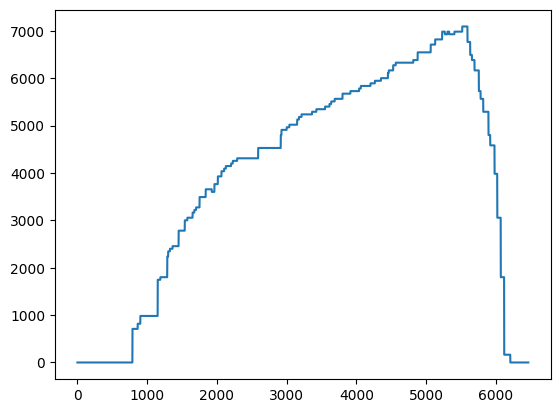

In [53]:
log_dfs['AT7215_16x14XOR_12s_Run_2']['escRPM'].plot()

In [59]:
for col in log_dfs['AT7215_16x14XOR_12s_Run_2'].columns:
    print(col)

loopIteration
time (us)
dateTime
axisRate[0]
axisRate[1]
axisRate[2]
axisP[0]
axisP[1]
axisP[2]
axisI[0]
axisI[1]
axisI[2]
axisD[0]
axisD[1]
axisD[2]
axisF[0]
axisF[1]
axisF[2]
fwAltP
fwAltI
fwAltD
fwAltOut
fwPosP
fwPosI
fwPosD
fwPosOut
rcData[0]
rcData[1]
rcData[2]
rcData[3]
rcCommand[0]
rcCommand[1]
rcCommand[2]
rcCommand[3]
vbat (V)
amperage (A)
BaroAlt (cm)
rssi
gyroADC[0]
gyroADC[1]
gyroADC[2]
accSmooth[0]
accSmooth[1]
accSmooth[2]
attitude[0]
attitude[1]
attitude[2]
motor[0]
servo[0]
servo[1]
servo[2]
servo[3]
servo[4]
servo[5]
servo[6]
servo[7]
servo[8]
servo[9]
servo[10]
servo[11]
servo[12]
servo[13]
servo[14]
servo[15]
navState
navFlags
navEPH
navEPV
navPos[0]
navPos[1]
navPos[2]
navVel[0]
navVel[1]
navVel[2]
navTgtVel[0]
navTgtVel[1]
navTgtVel[2]
navTgtPos[0]
navTgtPos[1]
navTgtPos[2]
navSurf
energyCumulative (mAh)
flightModeFlags (flags)
stateFlags (flags)
failsafePhase (flags)
rxSignalReceived
rxFlightChannelsValid
hwHealthStatus
powerSupplyImpedance
sagCompensatedVBat
wind

In [67]:
log_dfs['AT7215_16x14XOR_12s_Run_3'][['loopIteration', 'escRPM', 'amperage (A)', 'vbat (V)', 'rcData[3]', 'motor[0]']]

,loopIteration,escRPM,amperage (A),vbat (V),rcData[3],motor[0]
0,736,0,0.61,44.39,1065,1000
1,768,0,0.61,44.38,1065,1000
2,772,0,0.61,44.38,1065,1000
3,776,0,0.61,44.38,1065,1000
4,780,0,0.61,44.38,1065,1000
...,...,...,...,...,...,...
6553,26996,0,0.68,44.01,1065,1000
6554,27000,0,0.68,44.01,1065,1000
6555,27004,0,0.68,44.01,1065,1000
6556,27008,0,0.68,44.01,1065,1000


In [68]:
run_dfs['AT7215_16x14XOR_12s_Run_3'][['loopIteration', 'thrust (g)']]

,loopIteration,thrust (g)
0,4145,0.0237
1,4235,0.0594
2,4325,0.0712
3,4414,0.0712
4,4504,0.0594
...,...,...
397,39817,-40.4280
398,39907,-40.3211
399,39997,-40.2617
400,40086,-40.1786


In [85]:
for run in runs:
    if run.startswith("AT5330"):
        log_dfs[run]['correctedRPM'] = log_dfs[run]['escRPM'] * 22.0/14.0
    else:
        log_dfs[run]['correctedRPM'] = log_dfs[run]['escRPM']

In [87]:
merged_dfs: dict[str, pd.DataFrame] = dict()
peak_df = pd.DataFrame(columns=['motor', 'prop', 'battery', 'max_thrust (g)', 'max_correctedRPM', 'max_current', 'max_voltage', 'max_throttle'])
for run in runs:
    log_df = log_dfs[run][['loopIteration', 'correctedRPM', 'amperage (A)', 'vbat (V)', 'rcData[3]']]
    log_df.columns = ['loopIteration', 'correctedRPM', 'current', 'voltage', 'throttle']
    run_df = run_dfs[run]
    merged_dfs[run] = pd.merge_asof(run_df, log_df, on='loopIteration', direction='nearest')
    peak_df = pd.concat(
        [
            peak_df,
            pd.DataFrame.from_records(
                [
                    {
                        "motor": run_df['motor'].iloc[0],
                        "prop": run_df['prop'].iloc[0],
                        "battery": run_df['battery'].iloc[0],
                        "max_thrust (g)": run_df['thrust (g)'].max(),
                        "max_correctedRPM": log_df['correctedRPM'].max(),
                        "max_current": log_df['current'].max(),
                        "max_voltage": log_df['voltage'].max(),
                        "max_throttle": log_df['throttle'].max(),
                    }
                ]
            ),
        ],
        ignore_index=True,
    )

In [88]:
peak_df.head()

,motor,prop,battery,max_thrust (g),max_correctedRPM,max_current,max_voltage,max_throttle
0,AT7215,15x14x3,12s,13961.8850,10473,96.76,49.01,2011
1,AT7215,17x12,8s,6197.2456,7309,49.10,33.62,2011
2,AT5330,14x13x3,12s,8167.6963,8485.714286,43.51,46.97,2011
3,AT7215,18x14,12s,11253.3180,9109,98.06,47.61,2011
4,AT5330,16x10x3,12s,9075.9189,8399.285714,43.43,46.37,2011


In [89]:
peak_df.to_csv('../data/thrustStand/10_22_2023/peak.csv')

In [77]:
merged_dfs.keys()

dict_keys(['AT7215_15x14x3_12s', 'AT7215_17x12_8s', 'AT5330_14x13x3_12s', 'AT7215_18x14_12s', 'AT5330_16x10x3_12s', 'AT7215_19x10_12s', 'AT7215_14x13x3_12s', 'AT7215_18x12_12s', 'AT7215_16x10x3_12s', 'AT7215_16x14_12s', 'AT7215_16x16_8s', 'AT5330_15x14x3_12s', 'AT7215_16x12_12s', 'AT7215_16x16_12s', 'AT7215_17x12_12s', 'AT7215_16x14XOR_12s_Run_2', 'AT7215_15x13'])

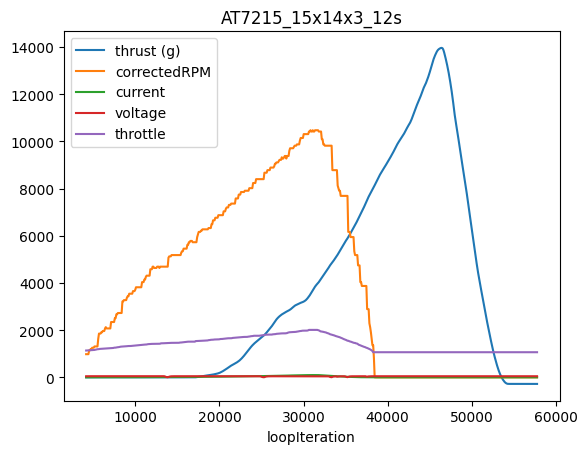

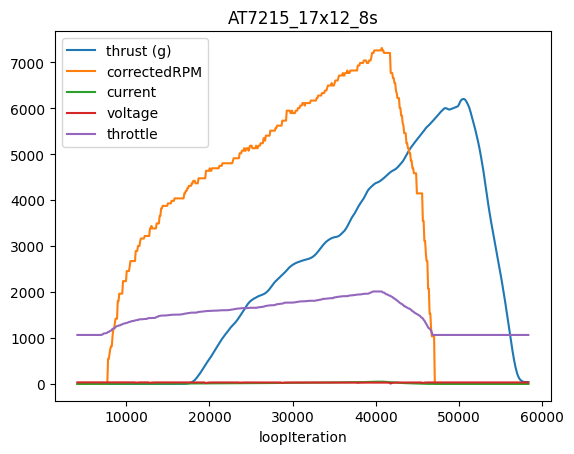

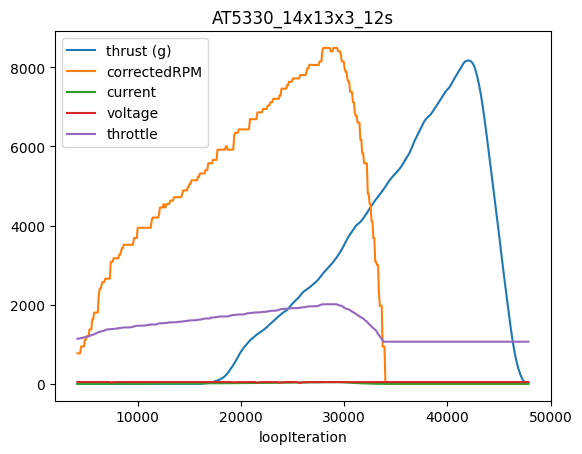

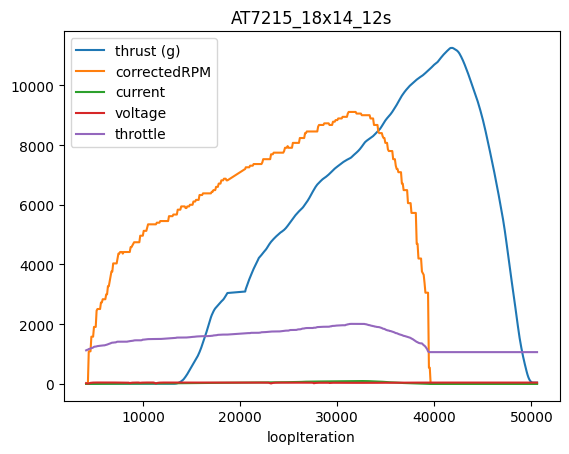

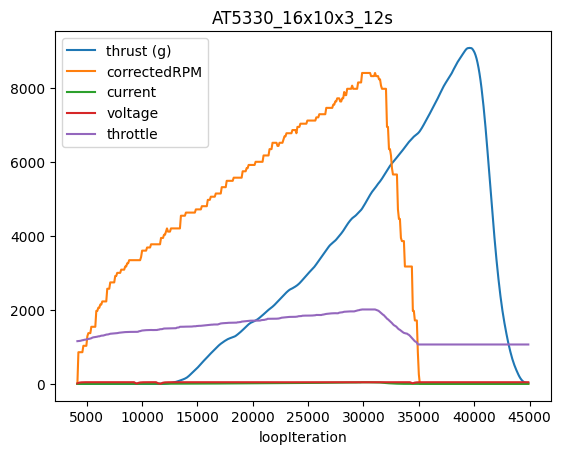

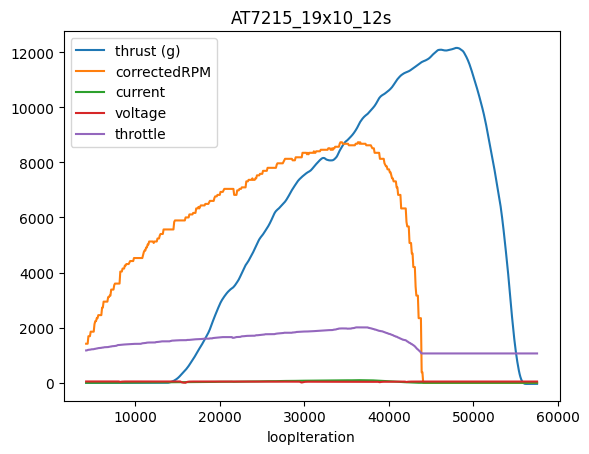

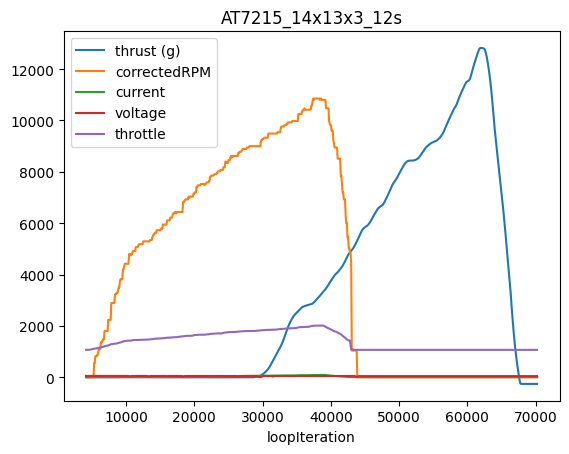

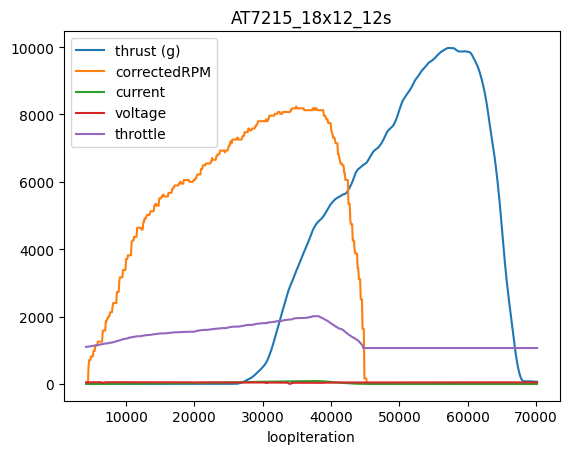

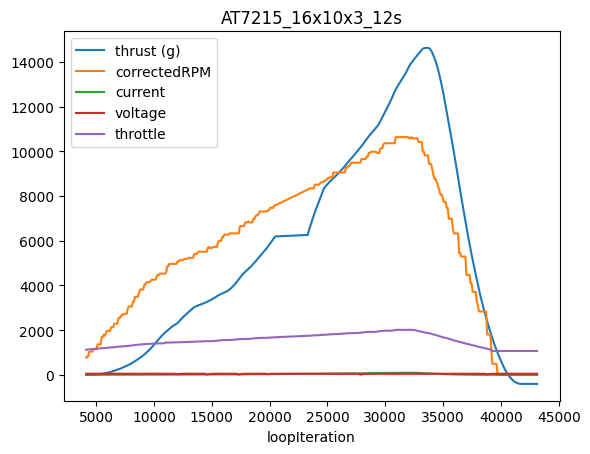

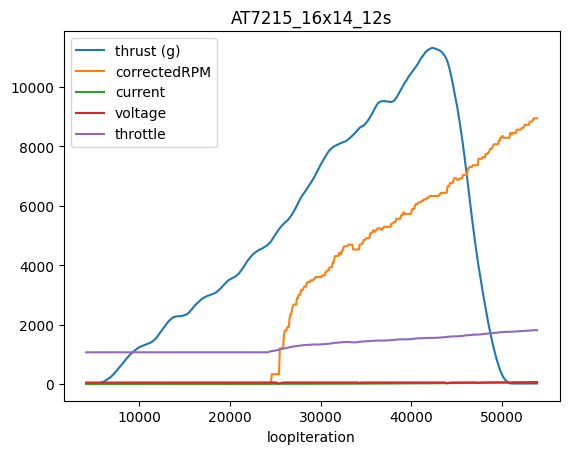

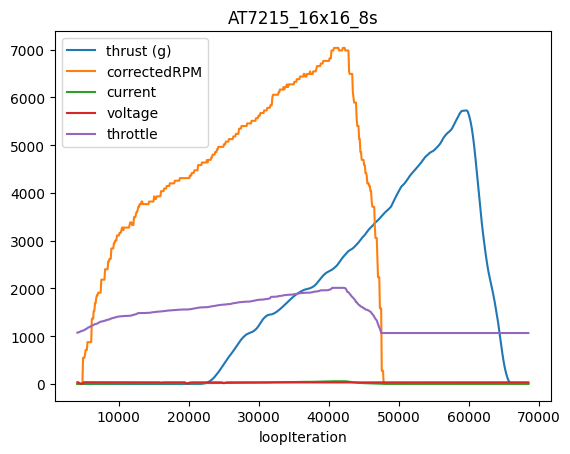

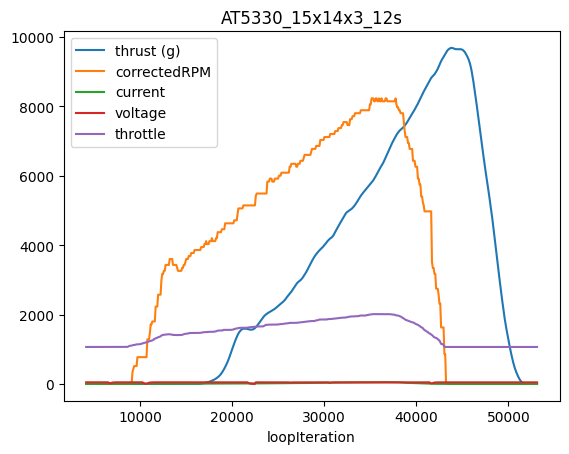

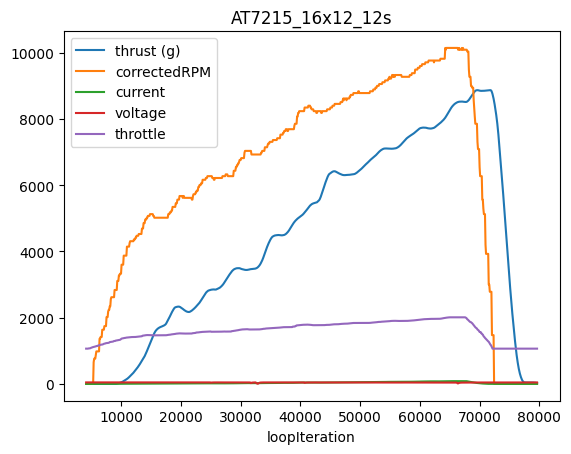

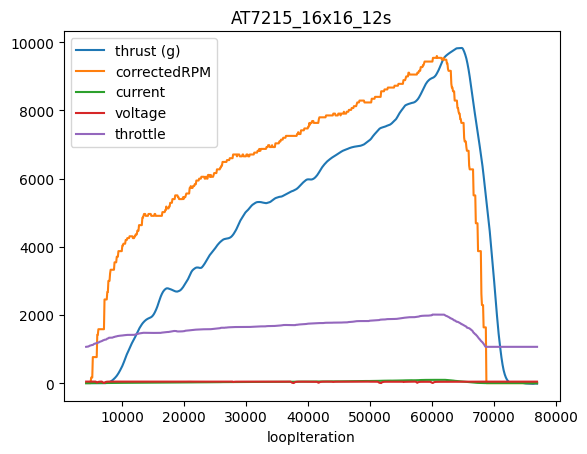

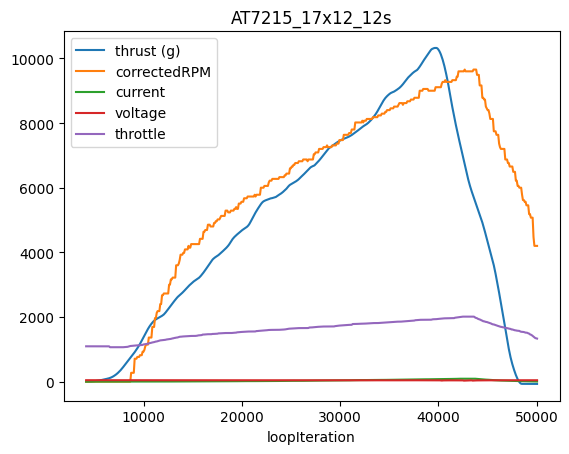

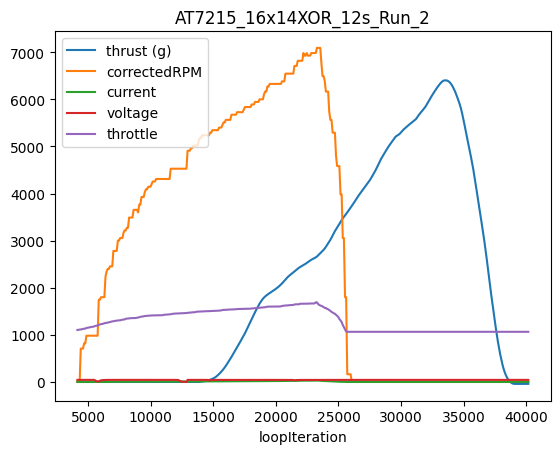

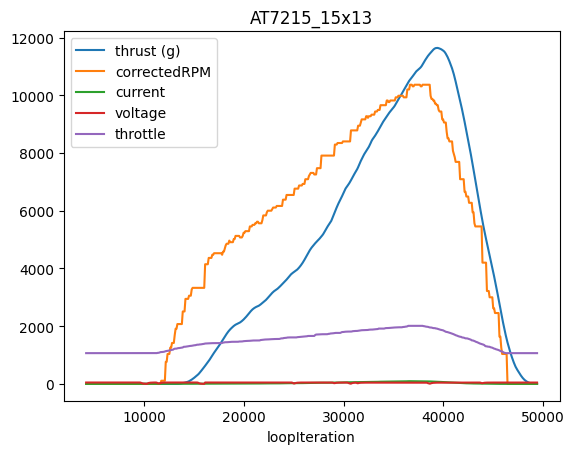

In [92]:
for run in runs:
    merged_dfs[run].plot(x='loopIteration')
    plt.title(run)